DBSCAN (which stand for Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away).

The main benefitt of DBSCAN is that it does not require the number of clusters to be specified in advance, and it can find arbitrarily shaped clusters. It also has a notion of noise, and is robust to outliers.

It have somewhat slower performance than K-means and Agglomerative clustering, but it is still a very efficient algorithm.

There are two main parameters that need to be set in DBSCAN:
- `eps`: The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.
- `min_samples`: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

#### How it work

Points are classified as core points, (density-)reachable points and outliers. A point p is a core point if at least `min_samples` points are within distance `eps` of it (including p). Those core points that are closer to each other than the distance eps are put into the same cluster by the algorithm. Then, for each core point, the algorithm forms a cluster of all points that are density-reachable from that core point. A point is density-reachable from another point if it is within distance eps from that point and there is a path of core points (points that are core points themselves, or are directly density-reachable from a core point) between them. Finally, any points that are not density-reachable from any other point are considered outliers by the algorithm.

For detail you can watch this: https://www.youtube.com/watch?v=RDZUdRSDOok

So in short, at the final cluster there are three kinds of points: core points, points that are within distance eps of core points (called boundary points), and noise.

Let’s apply DBSCAN on the synthetic dataset we used to demonstrate agglomerative clustering. Like agglomerative clustering, DBSCAN does not allow predictions on new test data, so we will use the fit_predict method to perform clustering and return the cluster labels in one step:

In [14]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import mglearn
import matplotlib.pyplot as plt

In [3]:
X, y = make_blobs(n_samples = 200, centers = 3, random_state = 12)

In [4]:
dbscan = DBSCAN(eps = 0.5, min_samples = 5)

In [5]:
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1  0  1  2 -1  2  2  1  2 -1  0  1  1 -1  2  1  1  2  2 -1  0 -1 -1
 -1  0  0  0  2  2 -1 -1  2  2 -1  0 -1  0  1  2  1 -1  2  1  0  2  2  1
  2  0 -1  2  2 -1 -1  2  0 -1  1  1  0  2 -1  1 -1 -1  2  0 -1  0  0  2
  0  3  1  0  2  2 -1  2  1  2  1  1  0 -1  0  2  2  3  2  1 -1  2  1  2
  2  1  1  2  2  2  0  1 -1  2  1 -1  0 -1  0  1 -1  1  0  1  2  2  1  2
  0  0 -1 -1  2  1  2  1  0  3  1  0 -1 -1 -1  1  2 -1  1 -1  1  2  0  1
  1 -1 -1  2  1 -1 -1 -1  2 -1  0  2 -1  2  1 -1  3  2  1 -1 -1  2  1  2
 -1  1  0 -1  2  1  0 -1  1  2 -1  2 -1  1  1  3  1  3  2  0 -1 -1 -1 -1
  2  1  0  0  2 -1 -1  1]


As you can see, all data points were assigned the label -1, which stands for noise. This is a consequence of the default parameter settings for `eps` and `min_samples`, which are not tuned for small toy datasets. The cluster assignments for different values of `min_samples` and `eps` are shown below

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


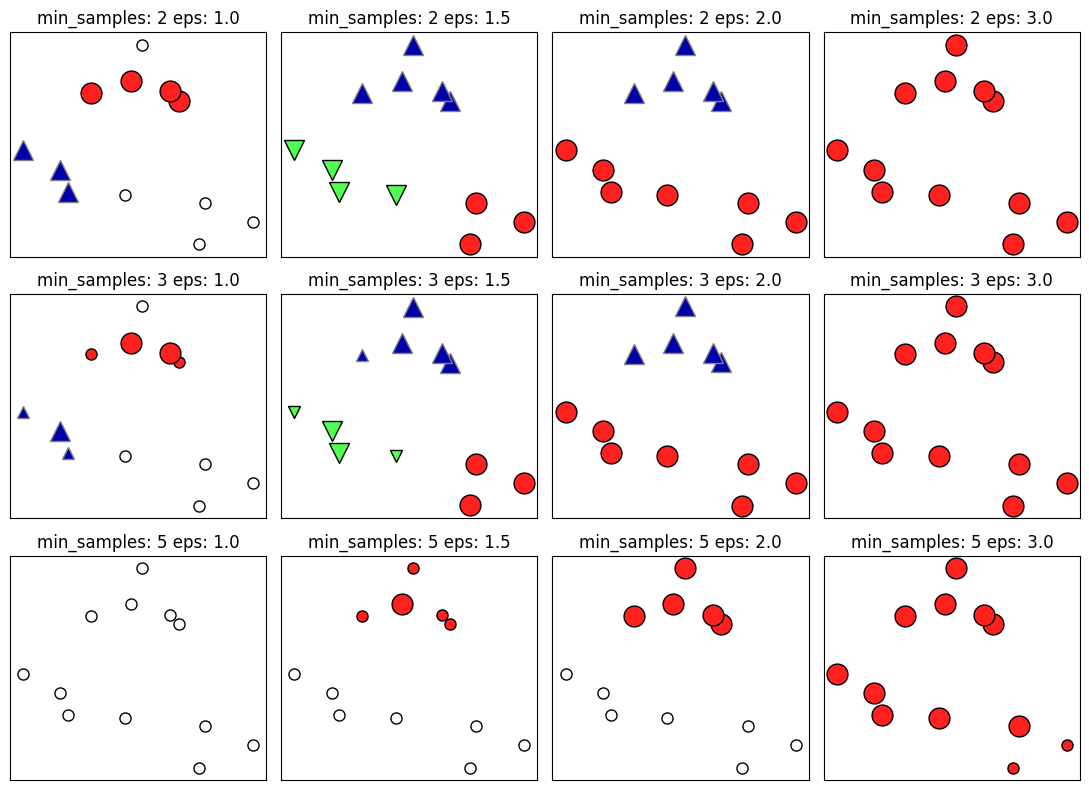

In [8]:
mglearn.plots.plot_dbscan()

For the two moons datasets, DBSCAN works quite well without any parameter tuning, and the two moons are correctly identified as separate clusters. Not like Agglomerative clustering, DBSCAN can find clusters of arbitrary shapes, and is also robust to noise.

In [10]:
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

In [11]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [12]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]


Text(0, 0.5, 'Feature 1')

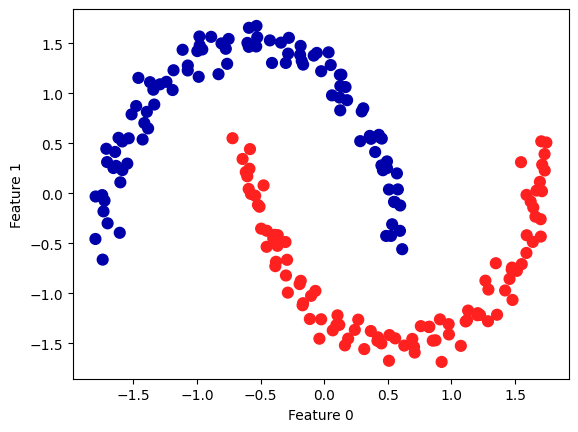

In [15]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = clusters, cmap = mglearn.cm2, s = 60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")